# Python Netflix Dataset

Analyze a Netflix Movies and TV shows Dataset 

In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [87]:
netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Loading, Inspecting and Cleaning the dataset

Using functions such as .info(), .describe(), .rename(), etc...

In [88]:
netflix_data.info()
#making sure that numeric columns are typed as int64 and that descriptive columns are of type object
#keep in mind that rating means age rating and duration is in terms of seasons or minutes (TV show or movie respectively)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [89]:
loc_split = netflix_data["duration"].str.split(
    pat = " ",
    expand = True
)
netflix_data["duration_time"] = loc_split[0]
netflix_data["minutes_or_seasons_type"] = loc_split[1]
netflix_data.head()

#making two more columns where I essentially split the duration

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_time,minutes_or_seasons_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [90]:
nan_df = netflix_data[netflix_data.isna().any(axis = 1)]
nan_df.head()

#checking for NaN values in the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_time,minutes_or_seasons_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [91]:
netflix_data["duration_time"] = netflix_data["duration_time"].astype(float)
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   show_id                  8807 non-null   object 
 1   type                     8807 non-null   object 
 2   title                    8807 non-null   object 
 3   director                 6173 non-null   object 
 4   cast                     7982 non-null   object 
 5   country                  7976 non-null   object 
 6   date_added               8797 non-null   object 
 7   release_year             8807 non-null   int64  
 8   rating                   8803 non-null   object 
 9   duration                 8804 non-null   object 
 10  listed_in                8807 non-null   object 
 11  description              8807 non-null   object 
 12  duration_time            8804 non-null   float64
 13  minutes_or_seasons_type  8804 non-null   object 
dtypes: float64(1), int64(1),

In [92]:
netflix_data["rating"].describe()

count      8803
unique       17
top       TV-MA
freq       3207
Name: rating, dtype: object

In [93]:
netflix_data["rating"].value_counts(normalize = True)

rating
TV-MA       0.364308
TV-14       0.245371
TV-PG       0.098035
R           0.090765
PG-13       0.055663
TV-Y7       0.037942
TV-Y        0.034874
PG          0.032603
TV-G        0.024991
NR          0.009088
G           0.004658
TV-Y7-FV    0.000682
NC-17       0.000341
UR          0.000341
74 min      0.000114
84 min      0.000114
66 min      0.000114
Name: proportion, dtype: float64

In [94]:
column_mapper = {"rating": "age_rating", "listed_in": "genre"}
netflix_data = netflix_data.rename(
    mapper = column_mapper,
    axis = 1
)
netflix_data["title"].str.title()
netflix_data.head()
#checking the renamed columns 

,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,genre,description,duration_time,minutes_or_seasons_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons


### Data Preparation

In [95]:
pivoted_data = pd.pivot_table(netflix_data, index = ["title"], values = ["release_year"])
print(pivoted_data)
pivoted_data["release_year"].value_counts()

                               release_year
title                                      
#Alive                               2020.0
#AnneFrank - Parallel Stories        2019.0
#FriendButMarried                    2018.0
#FriendButMarried 2                  2020.0
#Roxy                                2018.0
...                                     ...
忍者ハットリくん                             2012.0
海的儿子                                 2016.0
마녀사냥                                 2015.0
반드시 잡는다                              2017.0
최강전사 미니특공대 : 영웅의 탄생                  2018.0

[8807 rows x 1 columns]


release_year
2018.0    1147
2017.0    1032
2019.0    1030
2020.0     953
2016.0     902
          ... 
1925.0       1
1961.0       1
1947.0       1
1959.0       1
1966.0       1
Name: count, Length: 74, dtype: int64

### Data Analysis and Visualizations

answering questions related to the data to find optimized solutions/answers

##### Working on the statistical data, focusing on the release year column, carrying our functions such as plotting onto a bar graph for comparison

In [96]:
year_of_release = netflix_data["release_year"].value_counts()

In [97]:
release_year_data = netflix_data["release_year"].value_counts().rename_axis('unique_values').reset_index(name='counts')
print(release_year_data)

#Netflix has most movies and shows from 2018 than other years

    unique_values  counts
0            2018    1147
1            2017    1032
2            2019    1030
3            2020     953
4            2016     902
..            ...     ...
69           1959       1
70           1925       1
71           1961       1
72           1947       1
73           1966       1

[74 rows x 2 columns]


the bar graph shown plotting the release year against the number of movies/shows there are that year is a left-skewed unimodal dataset


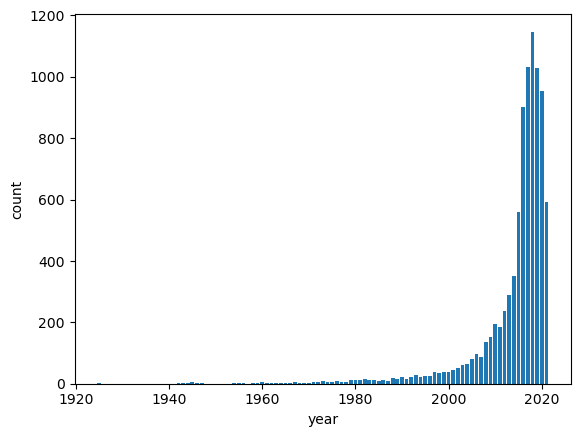

In [98]:
plt.bar(release_year_data["unique_values"], release_year_data["counts"])
plt.xlabel("year")
plt.ylabel("count")
print("the bar graph shown plotting the release year against the number of movies/shows there are that year is a left-skewed unimodal dataset")
#left skewed dataset

In [99]:
average_year_release = np.mean(netflix_data["release_year"])
middle_year_release = np.median(netflix_data["release_year"])
earliest_year_release = np.min(netflix_data["release_year"])
latest_year_release = np.max(netflix_data["release_year"])
print("the average year of release is "+ str(int(average_year_release)))
print("the medain year of release is "+ str(int(middle_year_release)))
print("the earliest year of release is " + str(earliest_year_release))
print("the latest year of release is " + str(latest_year_release))

the average year of release is 2014
the medain year of release is 2017
the earliest year of release is 1925
the latest year of release is 2021


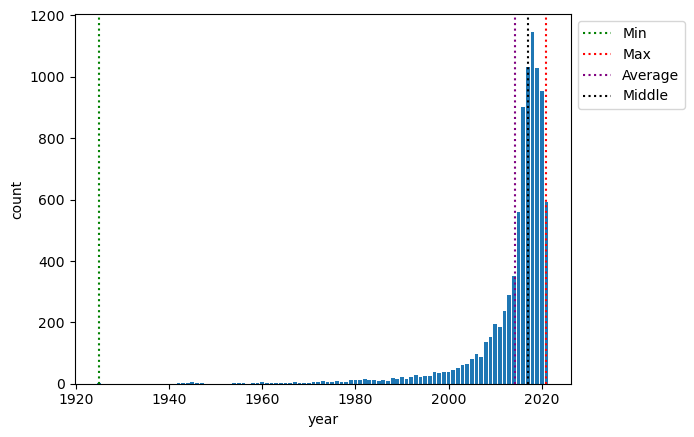

In [100]:
plt.bar(release_year_data["unique_values"], release_year_data["counts"])
plt.xlabel("year")
plt.ylabel("count")
plt.axvline(earliest_year_release, 0, 1, linestyle = "dotted", color = "green", label = "Min")
plt.axvline(latest_year_release, 0, 1, linestyle = "dotted", color = "red", label = "Max")
plt.axvline(average_year_release, 0, 1, linestyle = "dotted", color = "Purple", label = "Average")
plt.axvline(middle_year_release, 0, 1, linestyle = "dotted", color = "black", label = "Middle")
plt.legend(bbox_to_anchor = (1,1))

In [101]:
year_std = np.std(netflix_data["release_year"])
year_quartiles = np.quantile(netflix_data["release_year"], [0.25, 0.5, 0.75])
print(year_std)
print(year_quartiles)

8.818811417623284
[2013. 2017. 2019.]


as we see in the data, visually the lines are not of equal length apart but in terms of the data, these 
are the exact points of the 25th, 50th and 75th percentile respectively


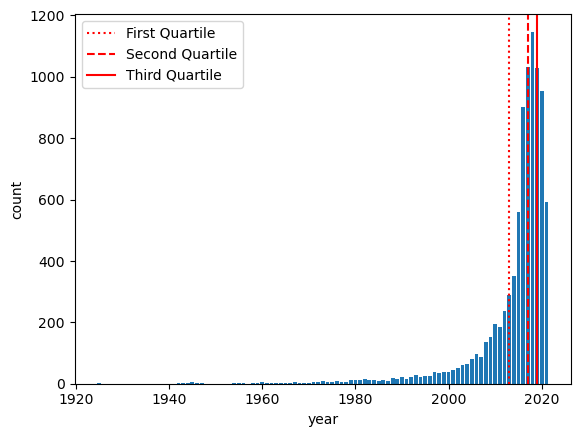

In [102]:
plt.bar(release_year_data["unique_values"], release_year_data["counts"])
plt.xlabel("year")
plt.ylabel("count")
plt.axvline(2013, 0, 1, linestyle = "dotted", color = "red", label = "First Quartile")
plt.axvline(2017, 0, 1, linestyle = "dashed", color = "red", label = "Second Quartile")
plt.axvline(2019, 0, 1, color = "red", label = "Third Quartile")
plt.legend()
print("as we see in the data, visually the lines are not of equal length apart but in terms of the data, these \nare the exact points of the 25th, 50th and 75th percentile respectively")

In [103]:
# figure out how to get the title of the movie/show in the mix and max release date and return it
netflix_data = netflix_data.sort_values(by = "release_year")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,genre,description,duration_time,minutes_or_seasons_type
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,1.0,Season
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,52.0,min
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,18.0,min
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,61.0,min
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,82.0,min


In [104]:
earliest_netflix_title = netflix_data.iloc[[0], [2]]
latest_netflix_title = netflix_data.iloc[[-1], [2]]
print(earliest_netflix_title)
print(latest_netflix_title)
#if the user wanted to watch the earliest or latest show released on netflix then they can look at this data to find the show name

                                  title
4250  Pioneers: First Women Filmmakers*
      title
965  Yasuke


In [105]:
years = []
for i in netflix_data["release_year"]:
    if i in years:
        continue
    else:
        years.append(i)

print(years)

#here we can just go through the years and see which were not included in this dataset. We can take note that as the years come closer to our 
#current age the years do not tend to skip but rather goes on as years + 1. This is because movies are more mass produced now more than ever.

[1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


##### Working on the statistical data, focusing on the country column